In [6]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix_road_sign"

/content/drive/My Drive/Colab Notebooks/dw_matrix_road_sign


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [10]:
train = pd.read_pickle('data/train.p')
train.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [12]:
X_train, y_train = train['features'], train['labels']
X_train.shape, y_train.shape

((34799, 32, 32, 3), (34799,))

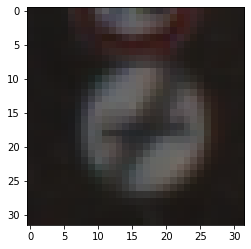

In [19]:
plt.imshow(X_train[0])

In [21]:
ls -al data

total 117897
-rw------- 1 root root       986 Mar 30 18:48 signnames.csv
-rw------- 1 root root  13578712 Mar 30 18:47 test.p
-rw------- 1 root root 107146452 Mar 30 18:47 train.p


In [23]:
signames = pd.read_csv('data/signnames.csv')
signames.head(10)

,a,b
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [28]:
dict_signs = signames.to_dict()['b']
dict_signs[30]

'Beware of ice/snow'

In [29]:
X_train[ y_train  == 30].shape

(390, 32, 32, 3)

In [33]:
for id_sign in dict_signs.keys():
  given_sign = X_train[ y_train == id_sign ]
  plt.figure(figsize=(15,5))
  for i in range(9):
    plt.subplot('19{0}'.format(i+1))
    plt.imshow(given_sign[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

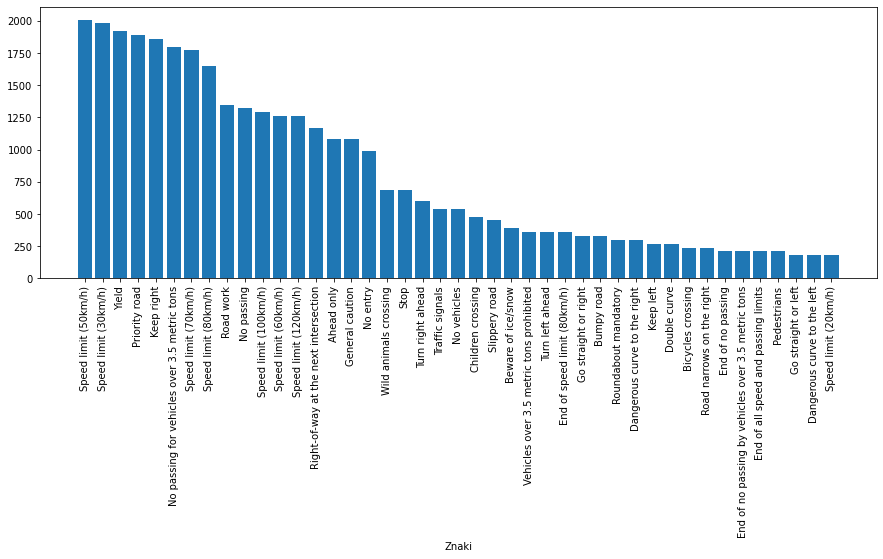

In [42]:
cnt = Counter( y_train ).most_common()

id_labels, cnt_labels = zip(*cnt)
ids = range(len(id_labels))

plt.figure(figsize=(15,5))
plt.bar(ids,cnt_labels)

plt.xlabel('Znaki')
labels = [dict_signs[id_labels[id]] for id in ids]
plt.xticks(ids, labels, rotation='vertical')
plt.show()